# 전국 1인 가구 분포도 시각화

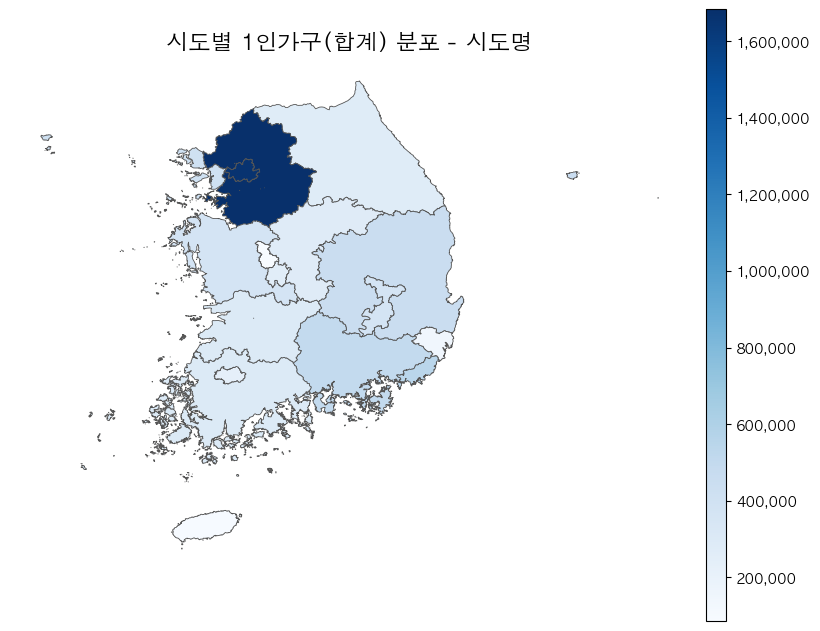

✅ 저장 완료: /Users/jeonhyewon/Desktop/스마트팩토리10기/6캔두잇/korea_sido_labels_only.png


In [ ]:
import os
import platform
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

EXCEL_PATH = "1인가구_전국.xlsx"
GEOJSON_PATH = "HangJeongDong_ver20250401.geojson"
OUT_PNG = "korea_sido_labels_only.png"

def set_korean_font():
    sys = platform.system()
    candidates = {
        "Darwin": ["AppleGothic"],
        "Windows": ["Malgun Gothic"],
        "Linux": ["NanumGothic", "Noto Sans CJK KR", "Noto Sans KR", "DejaVu Sans"],
    }.get(sys, ["DejaVu Sans"])
    plt.rcParams["font.family"] = candidates[0]
    plt.rcParams["axes.unicode_minus"] = False

set_korean_font()

# --- Excel (시도/합계) ---
df = pd.read_excel(EXCEL_PATH, sheet_name="데이터")
df = df.rename(columns={df.columns[0]: "region", df.columns[1]: "age", df.columns[2]: "total"})
df["region"] = df["region"].ffill().astype(str).str.strip()
df["age"] = df["age"].astype(str).str.strip()
df["total"] = pd.to_numeric(df["total"], errors="coerce")

sido = df[df["age"].eq("합계")].copy()
sido = sido[~sido["region"].eq("전국")][["region", "total"]].dropna()

# --- GeoJSON (행정동 -> 시도 dissolve) ---
g = gpd.read_file(GEOJSON_PATH)
if "sidonm" not in g.columns:
    raise ValueError(f"GeoJSON에 'sidonm' 컬럼이 없어요. 현재 컬럼: {list(g.columns)}")
g["sidonm"] = g["sidonm"].astype(str).str.strip()
g_sido = g.dissolve(by="sidonm", as_index=False)

# --- merge ---
m = g_sido.merge(sido, left_on="sidonm", right_on="region", how="left")

# --- plot ---
plt.rcParams["axes.formatter.useoffset"] = False
fig, ax = plt.subplots(figsize=(8.5, 10.5))

vmin = m["total"].quantile(0.05)
vmax = m["total"].quantile(0.95)

m.plot(
    column="total",
    ax=ax,
    cmap="Blues",
    legend=True,
    vmin=vmin,
    vmax=vmax,
    edgecolor="#555555",
    linewidth=0.6,
    missing_kwds={"color": "lightgrey", "label": "데이터 없음"},
    legend_kwds={"shrink": 0.6, "aspect": 30, "pad": 0.02},  # ✅ 컬러바 줄이기
)

ax.set_title("시도별 1인가구(합계) 분포 - 시도명", fontsize=16)
ax.axis("off")
ax.set_aspect("equal")

# 컬러바 콤마 포맷
cax = ax.get_figure().axes[-1]
cax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))

plt.tight_layout()
plt.savefig(OUT_PNG, dpi=300, bbox_inches="tight", pad_inches=0.25)
plt.show()
print("✅ 저장 완료:", os.path.abspath(OUT_PNG))


/var/folders/zq/2z3yxb292_3493bpkdxm8ywr0000gn/T/ipykernel_1587/2758454474.py:74: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cent = m.geometry.centroid


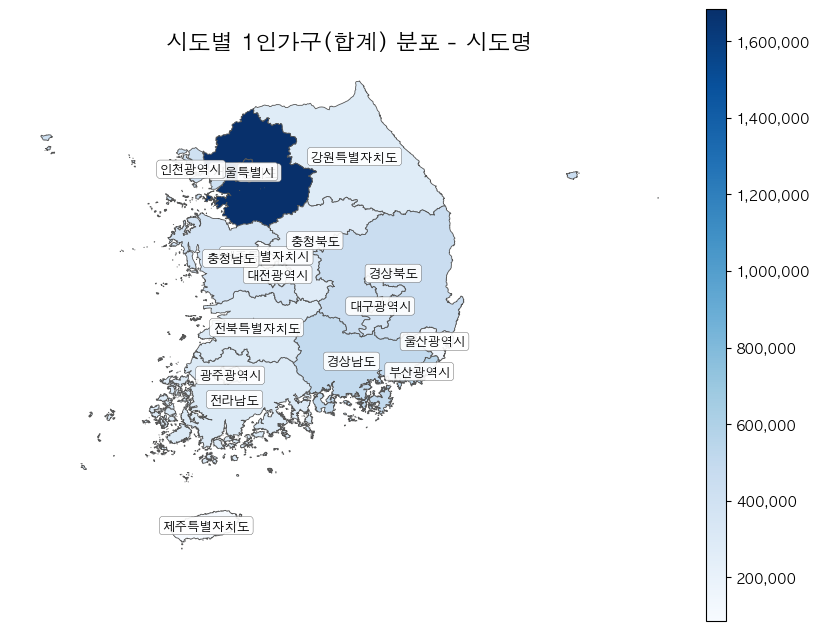

✅ 저장 완료: /Users/jeonhyewon/Desktop/스마트팩토리10기/6캔두잇/korea_sido_labels_only.png


In [14]:
import os
import platform
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

EXCEL_PATH = "1인가구_전국.xlsx"
GEOJSON_PATH = "HangJeongDong_ver20250401.geojson"
OUT_PNG = "korea_sido_labels_only.png"

def set_korean_font():
    sys = platform.system()
    candidates = {
        "Darwin": ["AppleGothic"],
        "Windows": ["Malgun Gothic"],
        "Linux": ["NanumGothic", "Noto Sans CJK KR", "Noto Sans KR", "DejaVu Sans"],
    }.get(sys, ["DejaVu Sans"])
    plt.rcParams["font.family"] = candidates[0]
    plt.rcParams["axes.unicode_minus"] = False

set_korean_font()

# --- Excel (시도/합계) ---
df = pd.read_excel(EXCEL_PATH, sheet_name="데이터")
df = df.rename(columns={df.columns[0]: "region", df.columns[1]: "age", df.columns[2]: "total"})
df["region"] = df["region"].ffill().astype(str).str.strip()
df["age"] = df["age"].astype(str).str.strip()
df["total"] = pd.to_numeric(df["total"], errors="coerce")

sido = df[df["age"].eq("합계")].copy()
sido = sido[~sido["region"].eq("전국")][["region", "total"]].dropna()

# --- GeoJSON (행정동 -> 시도 dissolve) ---
g = gpd.read_file(GEOJSON_PATH)
if "sidonm" not in g.columns:
    raise ValueError(f"GeoJSON에 'sidonm' 컬럼이 없어요. 현재 컬럼: {list(g.columns)}")
g["sidonm"] = g["sidonm"].astype(str).str.strip()
g_sido = g.dissolve(by="sidonm", as_index=False)

# --- merge ---
m = g_sido.merge(sido, left_on="sidonm", right_on="region", how="left")

# --- plot ---
plt.rcParams["axes.formatter.useoffset"] = False
fig, ax = plt.subplots(figsize=(8.5, 10.5))

vmin = m["total"].quantile(0.05)
vmax = m["total"].quantile(0.95)

m.plot(
    column="total",
    ax=ax,
    cmap="Blues",
    legend=True,
    vmin=vmin,
    vmax=vmax,
    edgecolor="#555555",
    linewidth=0.6,
    missing_kwds={"color": "lightgrey", "label": "데이터 없음"},
    legend_kwds={"shrink": 0.6, "aspect": 30, "pad": 0.02},  # ✅ 컬러바 줄이기
)

ax.set_title("시도별 1인가구(합계) 분포 - 시도명", fontsize=16)
ax.axis("off")
ax.set_aspect("equal")

# 컬러바 콤마 포맷
cax = ax.get_figure().axes[-1]
cax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))

# ✅ 시도명 라벨: 각 시도 중심(centroid)에 고정
# (가운데 우선, 겹침 방지 로직 없음)
cent = m.geometry.centroid
m["cx"] = cent.x
m["cy"] = cent.y

for _, r in m.iterrows():
    if pd.isna(r["total"]):   # 데이터 없는 시도는 생략(원하면 이 줄 제거)
        continue

    ax.text(
        r["cx"], r["cy"],
        r["sidonm"],
        ha="center", va="center",
        fontsize=9,
        bbox=dict(
            boxstyle="round,pad=0.25",
            fc="white",
            ec="#444444",
            lw=0.3,
            alpha=0.9
        ),
        zorder=5
    )


plt.tight_layout()
plt.savefig(OUT_PNG, dpi=300, bbox_inches="tight", pad_inches=0.25)
plt.show()
print("✅ 저장 완료:", os.path.abspath(OUT_PNG))

# 서울특별시 자치구 별 시각화

/Users/jeonhyewon/miniconda3/envs/py310/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ 엑셀에서 추출된 자치구 개수: 25
  region   total
0    강남구   79274
1    강동구   65601
2    강북구   53705
3    강서구  106748
4    관악구  153605


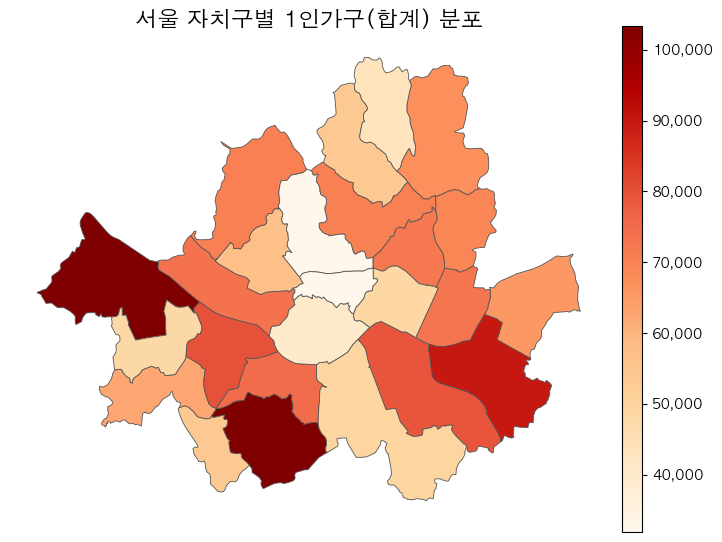

✅ 저장 완료: /Users/jeonhyewon/Desktop/스마트팩토리10기/6캔두잇/seoul_gu_single_households_only_gu_rows.png


In [ ]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import platform

# 파일 경로
EXCEL_PATH = "1인가구_서울.xlsx"
GEOJSON_PATH = "hangjeongdong_서울특별시.geojson"
OUT_PNG = "seoul_gu_single_households_only_gu_rows.png"

def set_korean_font():
    sys = platform.system()
    candidates = {
        "Darwin": ["AppleGothic"],
        "Windows": ["Malgun Gothic"],
        "Linux": ["NanumGothic", "Noto Sans CJK KR", "Noto Sans KR", "DejaVu Sans"],
    }.get(sys, ["DejaVu Sans"])
    plt.rcParams["font.family"] = candidates[0]
    plt.rcParams["axes.unicode_minus"] = False

set_korean_font()

# =========================
# 1) 엑셀 파싱: "두번째 컬럼=구명", "세번째 컬럼=값"만 사용
#    (합계/소계 줄 제거, '○○구'만 남기기)
# =========================
raw = pd.read_excel(EXCEL_PATH, header=None)  
raw = raw.iloc[:, :3].copy()               
raw.columns = ["lvl1", "region", "value"]

# region이 문자열인 것만
raw["region"] = raw["region"].astype(str).str.strip()

# '구'로 끝나는 행만(종로구~강동구)
gu = raw[raw["region"].str.endswith("구")].copy()

# 숫자 처리 (콤마 제거)
gu["total"] = (
    gu["value"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .str.strip()
)
gu["total"] = pd.to_numeric(gu["total"], errors="coerce")
gu = gu.dropna(subset=["total"])

gu = gu[["region", "total"]].groupby("region", as_index=False)["total"].sum()

print("✅ 엑셀에서 추출된 자치구 개수:", len(gu))
print(gu.head())

# =========================
# 2) GeoJSON: 행정동 -> 자치구 dissolve
# =========================
g = gpd.read_file(GEOJSON_PATH)
if "sggnm" not in g.columns:
    raise ValueError(f"GeoJSON에 'sggnm'(자치구명) 컬럼이 없어요. 현재 컬럼: {list(g.columns)}")

g["sggnm"] = g["sggnm"].astype(str).str.strip()
g_gu = g.dissolve(by="sggnm", as_index=False)

# =========================
# 3) merge
# =========================
m = g_gu.merge(gu, left_on="sggnm", right_on="region", how="left")

missing = m[m["total"].isna()]["sggnm"].tolist()
if missing:
    print("⚠️ 매칭 실패 자치구(엑셀에 없는 구):", missing)

# =========================
# 4) 시각화 (빨강/갈색 OrRd) + 저장
# =========================
# 서울은 구가 촘촘해서 미터 단위로 바꾸면 지도/라벨 안정적
if m.crs is not None:
    m = m.to_crs(epsg=5179)

fig, ax = plt.subplots(figsize=(7.5, 9.5))

# 색 범위는 전체를 다 보여주되, 극단값 때문에 한두개만 튀면 분위수 제한
vmin = m["total"].quantile(0.05)
vmax = m["total"].quantile(0.95)

m.plot(
    column="total",
    ax=ax,
    cmap="OrRd",
    legend=True,
    vmin=vmin,
    vmax=vmax,
    edgecolor="#555555",
    linewidth=0.6,
    missing_kwds={"color": "lightgrey", "label": "데이터 없음"},
    legend_kwds={"shrink": 0.55, "aspect": 25, "pad": 0.02},  # ✅ 컬러바 작게
)

ax.set_title("서울 자치구별 1인가구(합계) 분포", fontsize=16)
ax.axis("off")
ax.set_aspect("equal")

# 컬러바 콤마
cax = ax.get_figure().axes[-1]
cax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))

plt.tight_layout()
plt.savefig(OUT_PNG, dpi=300, bbox_inches="tight", pad_inches=0.25)
plt.show()
print("✅ 저장 완료:", os.path.abspath(OUT_PNG))


/Users/jeonhyewon/miniconda3/envs/py310/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ 엑셀에서 추출된 자치구 개수: 25
  region   total
0    강남구   79274
1    강동구   65601
2    강북구   53705
3    강서구  106748
4    관악구  153605


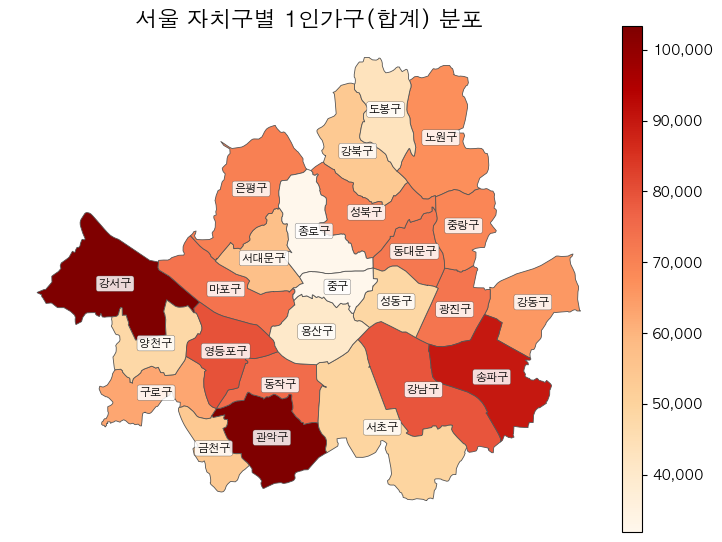

✅ 저장 완료: /Users/jeonhyewon/Desktop/스마트팩토리10기/6캔두잇/seoul_gu_single_households_only_gu_rows.png


In [ ]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import platform

# 파일 경로
EXCEL_PATH = "1인가구_서울.xlsx"
GEOJSON_PATH = "hangjeongdong_서울특별시.geojson"
OUT_PNG = "seoul_gu_single_households_only_gu_rows.png"

def set_korean_font():
    sys = platform.system()
    candidates = {
        "Darwin": ["AppleGothic"],
        "Windows": ["Malgun Gothic"],
        "Linux": ["NanumGothic", "Noto Sans CJK KR", "Noto Sans KR", "DejaVu Sans"],
    }.get(sys, ["DejaVu Sans"])
    plt.rcParams["font.family"] = candidates[0]
    plt.rcParams["axes.unicode_minus"] = False

set_korean_font()

# =========================
# 1) 엑셀 파싱: "두번째 컬럼=구명", "세번째 컬럼=값"만 사용
#    (합계/소계 줄 제거, '○○구'만 남기기)
# =========================
raw = pd.read_excel(EXCEL_PATH, header=None)  # ✅ 헤더 없다고 가정하고 통째로 읽기
raw = raw.iloc[:, :3].copy()                 # 보통 3컬럼(합계/구명/값)
raw.columns = ["lvl1", "region", "value"]

# region이 문자열인 것만
raw["region"] = raw["region"].astype(str).str.strip()

# '구'로 끝나는 행만(종로구~강동구)
gu = raw[raw["region"].str.endswith("구")].copy()

# 숫자 처리 (콤마 제거)
gu["total"] = (
    gu["value"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .str.strip()
)
gu["total"] = pd.to_numeric(gu["total"], errors="coerce")
gu = gu.dropna(subset=["total"])

gu = gu[["region", "total"]].groupby("region", as_index=False)["total"].sum()

print("✅ 엑셀에서 추출된 자치구 개수:", len(gu))
print(gu.head())

# =========================
# 2) GeoJSON: 행정동 -> 자치구 dissolve
# =========================
g = gpd.read_file(GEOJSON_PATH)
if "sggnm" not in g.columns:
    raise ValueError(f"GeoJSON에 'sggnm'(자치구명) 컬럼이 없어요. 현재 컬럼: {list(g.columns)}")

g["sggnm"] = g["sggnm"].astype(str).str.strip()
g_gu = g.dissolve(by="sggnm", as_index=False)

# =========================
# 3) merge
# =========================
m = g_gu.merge(gu, left_on="sggnm", right_on="region", how="left")

missing = m[m["total"].isna()]["sggnm"].tolist()
if missing:
    print("⚠️ 매칭 실패 자치구(엑셀에 없는 구):", missing)

# =========================
# 4) 시각화 + 저장
# =========================
# 서울은 구가 촘촘해서 미터 단위로 바꾸면 지도/라벨 안정적
if m.crs is not None:
    m = m.to_crs(epsg=5179)

fig, ax = plt.subplots(figsize=(7.5, 9.5))

# 색 범위는 전체를 다 보여주되, 극단값 때문에 한두개만 튀면 분위수 
vmin = m["total"].quantile(0.05)
vmax = m["total"].quantile(0.95)

m.plot(
    column="total",
    ax=ax,
    cmap="OrRd",
    legend=True,
    vmin=vmin,
    vmax=vmax,
    edgecolor="#555555",
    linewidth=0.6,
    missing_kwds={"color": "lightgrey", "label": "데이터 없음"},
    legend_kwds={"shrink": 0.55, "aspect": 25, "pad": 0.02}, 
)

ax.set_title("서울 자치구별 1인가구(합계) 분포", fontsize=16)
ax.axis("off")
ax.set_aspect("equal")

# 컬러바 콤마
cax = ax.get_figure().axes[-1]
cax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))

# 자치구 이름 라벨: 가운데(centroid) 기준으로 고정
# (겹침 방지 로직 제거 → "가운데" 우선)
cent = m.geometry.centroid
m["cx"] = cent.x
m["cy"] = cent.y

for _, r in m.iterrows():
    if pd.isna(r["total"]):
        continue

    ax.text(
        r["cx"], r["cy"],
        r["sggnm"],
        ha="center", va="center",
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="#333333", lw=0.25, alpha=0.85),
        zorder=5
    )


plt.tight_layout()
plt.savefig(OUT_PNG, dpi=300, bbox_inches="tight", pad_inches=0.25)
plt.show()
print("✅ 저장 완료:", os.path.abspath(OUT_PNG))


/Users/jeonhyewon/miniconda3/envs/py310/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ 엑셀에서 추출된 자치구 개수: 25
  region   total
0    강남구   79274
1    강동구   65601
2    강북구   53705
3    강서구  106748
4    관악구  153605
✅ 마커(시설) 개수: 347
   asg_nm        remark  longitude   latitude
0  혜화안심06       CU종로공원점  127.00759  37.573204
1  혜화안심06     미니스톱종로효제점  127.00497  37.572605
2  혜화안심06     미니스톱종로6가점  127.00654  37.571434
3  중부안심08  세븐일레븐 중구황학동점  127.01980  37.568450
4  중부안심05       cu청구대로점  127.01285  37.559240


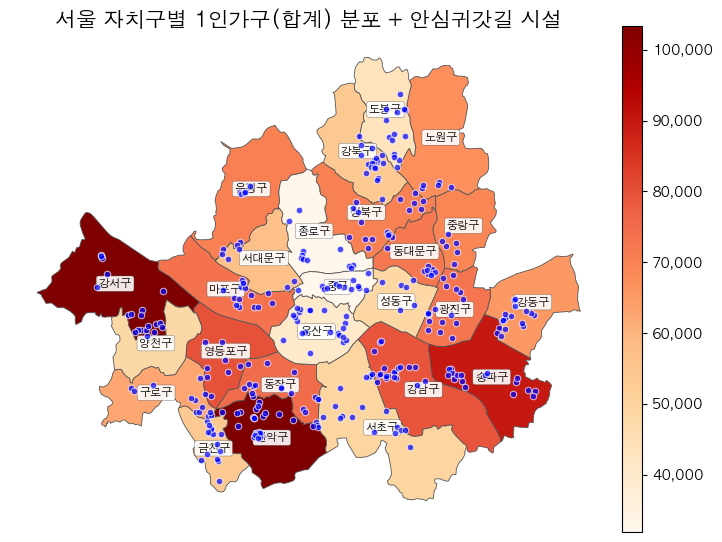

✅ 저장 완료: /Users/jeonhyewon/Desktop/스마트팩토리10기/6캔두잇/seoul_gu_single_households_with_markers.png


In [14]:
import os
import json
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import platform

# =========================
# 파일 경로
# =========================
EXCEL_PATH = "1인가구_서울.xlsx"
GEOJSON_PATH = "hangjeongdong_서울특별시.geojson"

# ✅ 추가: 마커(JSON) 파일 경로
JSON_PATH = "서울시 안심귀갓길 서비스.json"

OUT_PNG = "seoul_gu_single_households_with_markers.png"

# =========================
# 폰트 설정
# =========================
def set_korean_font():
    sys = platform.system()
    candidates = {
        "Darwin": ["AppleGothic"],
        "Windows": ["Malgun Gothic"],
        "Linux": ["NanumGothic", "Noto Sans CJK KR", "Noto Sans KR", "DejaVu Sans"],
    }.get(sys, ["DejaVu Sans"])
    plt.rcParams["font.family"] = candidates[0]
    plt.rcParams["axes.unicode_minus"] = False

set_korean_font()

# =========================
# 1) 엑셀 파싱: "구명", "값"만 사용 (합계/소계 제거, '○○구'만 남기기)
# =========================
raw = pd.read_excel(EXCEL_PATH, header=None)
raw = raw.iloc[:, :3].copy()
raw.columns = ["lvl1", "region", "value"]

raw["region"] = raw["region"].astype(str).str.strip()
gu = raw[raw["region"].str.endswith("구")].copy()

gu["total"] = (
    gu["value"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .str.strip()
)
gu["total"] = pd.to_numeric(gu["total"], errors="coerce")
gu = gu.dropna(subset=["total"])

gu = gu[["region", "total"]].groupby("region", as_index=False)["total"].sum()

print("✅ 엑셀에서 추출된 자치구 개수:", len(gu))
print(gu.head())

# =========================
# 2) GeoJSON: 행정동 -> 자치구 dissolve
# =========================
g = gpd.read_file(GEOJSON_PATH)
if "sggnm" not in g.columns:
    raise ValueError(f"GeoJSON에 'sggnm'(자치구명) 컬럼이 없어요. 현재 컬럼: {list(g.columns)}")

g["sggnm"] = g["sggnm"].astype(str).str.strip()
g_gu = g.dissolve(by="sggnm", as_index=False)

# =========================
# 3) merge
# =========================
m = g_gu.merge(gu, left_on="sggnm", right_on="region", how="left")

missing = m[m["total"].isna()]["sggnm"].tolist()
if missing:
    print("⚠️ 매칭 실패 자치구(엑셀에 없는 구):", missing)

# =========================
# ✅ 4) JSON 마커 읽기 -> GeoDataFrame 만들기
# =========================
with open(JSON_PATH, "r", encoding="utf-8") as f:
    j = json.load(f)

df_marker = pd.DataFrame(j["DATA"]).copy()

# 경도/위도 숫자형 처리
df_marker["longitude"] = pd.to_numeric(df_marker["longitude"], errors="coerce")
df_marker["latitude"] = pd.to_numeric(df_marker["latitude"], errors="coerce")
df_marker = df_marker.dropna(subset=["longitude", "latitude"])

g_marker = gpd.GeoDataFrame(
    df_marker,
    geometry=gpd.points_from_xy(df_marker["longitude"], df_marker["latitude"]),
    crs="EPSG:4326"  # ✅ JSON 좌표는 보통 WGS84(경위도)
)

print("✅ 마커(시설) 개수:", len(g_marker))
print(g_marker[["asg_nm", "remark", "longitude", "latitude"]].head())

# =========================
# 5) CRS 맞추기 (지도 m이 5179로 바뀌면 마커도 같이)
# =========================
# 서울은 구가 촘촘해서 미터 단위로 바꾸면 지도/라벨 안정적
if m.crs is not None:
    m = m.to_crs(epsg=5179)

# ✅ 마커도 동일 CRS로 변환 (매우 중요)
g_marker = g_marker.to_crs(m.crs)

# =========================
# 6) 시각화 + 저장
# =========================
fig, ax = plt.subplots(figsize=(7.5, 9.5))

vmin = m["total"].quantile(0.05)
vmax = m["total"].quantile(0.95)

m.plot(
    column="total",
    ax=ax,
    cmap="OrRd",
    legend=True,
    vmin=vmin,
    vmax=vmax,
    edgecolor="#555555",
    linewidth=0.6,
    missing_kwds={"color": "lightgrey", "label": "데이터 없음"},
    legend_kwds={"shrink": 0.55, "aspect": 25, "pad": 0.02},
)

ax.set_title("서울 자치구별 1인가구(합계) 분포 + 안심귀갓길 시설", fontsize=15)
ax.axis("off")
ax.set_aspect("equal")

# 컬러바 콤마
cax = ax.get_figure().axes[-1]
cax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))

# =========================
# ✅ 마커 추가
# =========================
# (1) 점 마커(깔끔/추천)
ax.scatter(
    g_marker.geometry.x,
    g_marker.geometry.y,
    s=22,
    alpha=0.7,
    edgecolor="white",
    color= "blue",
    linewidth=0.75,
    zorder=10,
)

# =========================
# 자치구 이름 라벨 (centroid)
# =========================
cent = m.geometry.centroid
m["cx"] = cent.x
m["cy"] = cent.y

for _, r in m.iterrows():
    if pd.isna(r["total"]):
        continue
    ax.text(
        r["cx"], r["cy"],
        r["sggnm"],
        ha="center", va="center",
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="#333333", lw=0.25, alpha=0.9),
        zorder=5
    )

plt.tight_layout()
plt.savefig(OUT_PNG, dpi=300, bbox_inches="tight", pad_inches=0.25)
plt.show()

print("✅ 저장 완료:", os.path.abspath(OUT_PNG))
